In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ML2_lib import loss
from ML2_lib import DC_SGD

In [2]:
# 学習率は0.01/t * sqrt(d) ノイズは正規分布
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 1000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
exp_normal = DC_SGD.DCSGD(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="normal",loss_type=son,c=c,fixed_lr=False)


  0%|          | 0/10 [00:00<?, ?it/s]

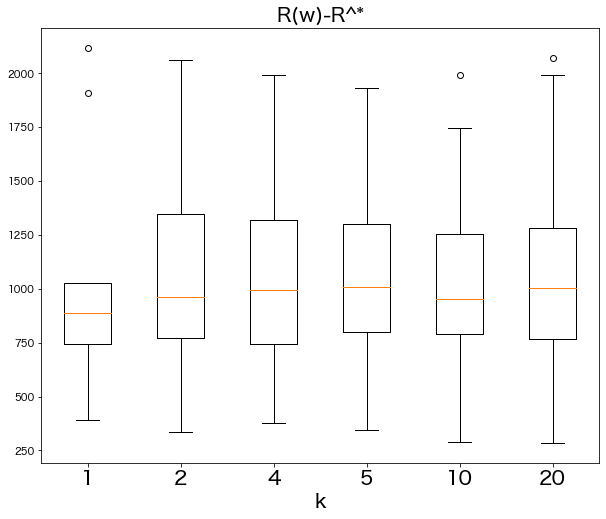

In [3]:
_, result_loss_gauss = exp_normal.many_trails(trial_num=10,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_gauss[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()


In [4]:
df = pd.DataFrame(result_loss_gauss[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1036.197863,1104.184023,1086.105567,1094.343424,1073.880165,1100.290915
std,552.902191,556.944775,511.925922,494.820347,505.404566,579.439813
min,392.372554,335.555585,379.779710,343.003681,287.851615,284.622916
25%,744.853535,772.967294,742.291732,799.328371,792.468679,766.341996
50%,885.608960,963.924539,992.641293,1009.639176,954.213544,1004.975358
75%,1027.434432,1349.009048,1318.098309,1299.965349,1252.388198,1282.145040
max,2118.736678,2061.167361,1991.817539,1929.402709,1989.710425,2072.998051


In [5]:
df.quantile([0.75,0.8,0.9,0.95,0.99])

,1,2,4,5,10,20
0.75,1027.434432,1349.009048,1318.098309,1299.965349,1252.388198,1282.145040
0.80,1205.551327,1476.078525,1427.175957,1427.844281,1352.515157,1425.399663
0.90,1931.441420,1928.109584,1795.215521,1816.233283,1771.524005,1999.441733
0.95,2025.089049,1994.638472,1893.516530,1872.817996,1880.617215,2036.219892
0.99,2100.007152,2047.861583,1972.157337,1918.085767,1967.891783,2065.642419


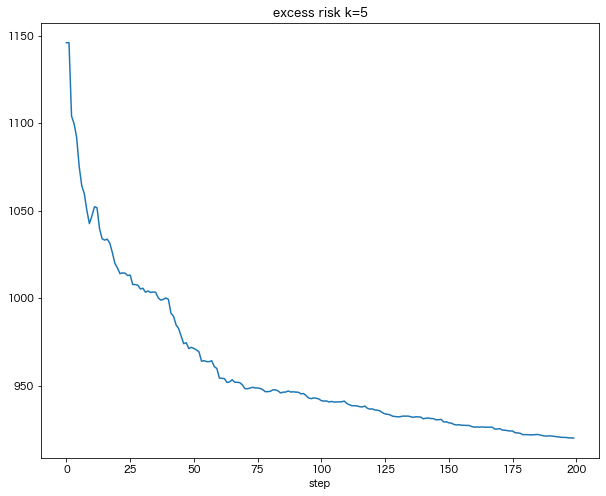

In [6]:
k = 5
_,loss_transition = exp_normal.transition(k=5,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(loss_transition)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()

In [7]:
# 学習率は0.01/t * sqrt(d) ノイズは対数正規分布
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 1000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
exp_lognormal = DC_SGD.DCSGD(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="lognormal",loss_type=son,c=c,fixed_lr=False)


  0%|          | 0/10 [00:00<?, ?it/s]

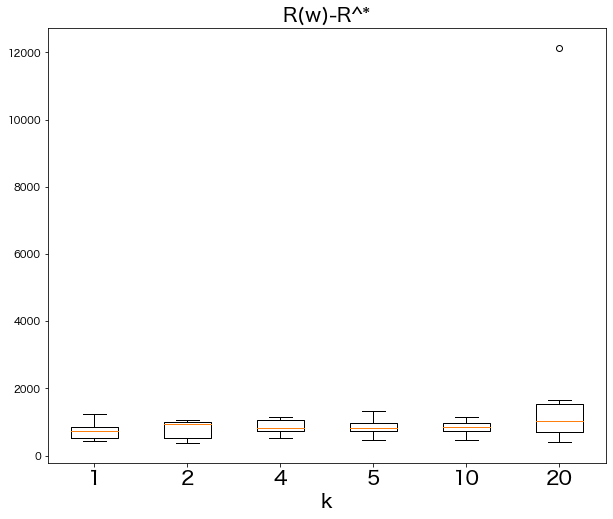

In [8]:
_, result_loss_lognormal = exp_lognormal.many_trails(trial_num=10,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_lognormal[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()


In [9]:
df = pd.DataFrame(result_loss_lognormal[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,745.418618,790.145605,857.117754,857.031688,851.590830,2111.740975
std,269.202750,276.396711,219.475322,251.024646,195.596071,3548.588630
min,436.732997,375.177418,523.411025,473.581225,474.882559,413.007445
25%,512.167865,529.433349,730.640279,724.781659,744.844832,697.885455
50%,744.359239,937.162665,813.785086,814.914667,841.874201,1045.460982
75%,846.715748,1014.735872,1068.513811,977.032291,960.454420,1549.861298
max,1231.932218,1055.579039,1144.249312,1333.888788,1154.528803,12136.481940


In [10]:
df.quantile([0.75,0.8,0.9,0.95,0.99])

,1,2,4,5,10,20
0.75,846.715748,1014.735872,1068.513811,977.032291,960.454420,1549.861298
0.80,903.208425,1028.363172,1120.194738,1014.799468,985.535311,1640.976684
0.90,1110.474791,1049.867841,1132.644273,1144.736704,1072.066594,2691.989820
0.95,1171.203505,1052.723440,1138.446793,1239.312746,1113.297699,7414.235880
0.99,1219.786475,1055.007919,1143.088808,1314.973579,1146.282582,11192.032728


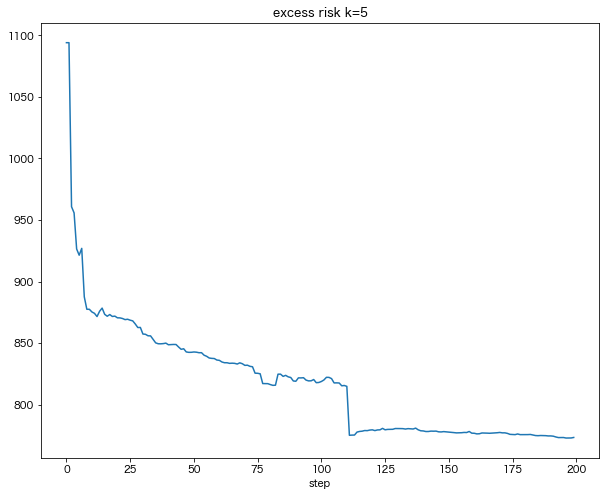

In [11]:
k = 5
_,loss_transition = exp_lognormal.transition(k=k,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(loss_transition)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()

In [12]:
# 学習率は0.01/sqrt(d) (固定) ノイズは正規分布
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 1000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
exp_normal = DC_SGD.DCSGD(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="normal",loss_type=son,c=c,fixed_lr=True)


  0%|          | 0/10 [00:00<?, ?it/s]

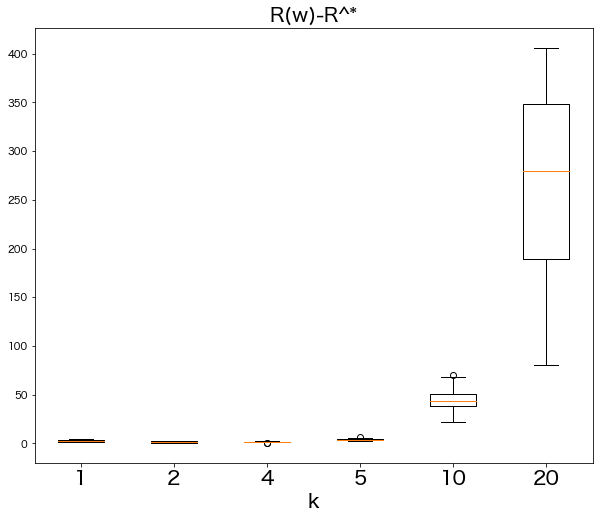

In [13]:
_, result_loss_gauss = exp_normal.many_trails(trial_num=10,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_gauss[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()


In [14]:
df = pd.DataFrame(result_loss_gauss[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2.345446,1.317589,1.404588,4.003207,45.156952,260.499406
std,1.261654,0.846804,0.639434,1.351021,14.980535,114.348888
min,0.929111,0.286841,0.261080,2.061817,21.737753,80.176928
25%,1.332240,0.619333,1.297719,3.219697,38.045833,189.653207
50%,1.991555,1.117195,1.329326,3.630948,43.263866,279.321468
75%,3.428952,2.026598,1.764380,4.524711,50.357838,348.656934
max,4.536965,2.771215,2.300973,6.540684,69.651412,406.191291


In [15]:
df.quantile([0.75,0.8,0.9,0.95,0.99])

,1,2,4,5,10,20
0.75,3.428952,2.026598,1.764380,4.524711,50.357838,348.656934
0.80,3.737860,2.199732,1.905792,4.926705,54.583515,358.045430
0.90,3.848260,2.299620,2.229238,5.930414,67.903691,374.257818
0.95,4.192612,2.535417,2.265106,6.235549,68.777552,390.224555
0.99,4.468094,2.724055,2.293800,6.479657,69.476640,402.997944


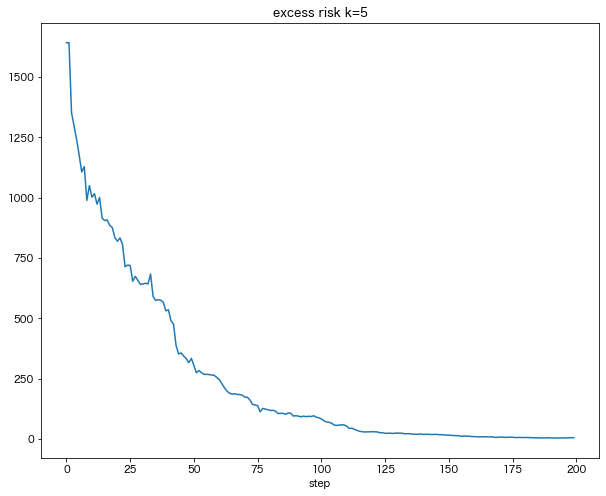

In [16]:
k = 5
_,loss_transition = exp_normal.transition(k=5,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(loss_transition)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()

In [17]:
# 学習率は0.01/sqrt(d)　（固定） ノイズは対数正規分布
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 1000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
exp_lognormal = DC_SGD.DCSGD(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="lognormal",loss_type=son,c=c,fixed_lr=True)


  0%|          | 0/10 [00:00<?, ?it/s]

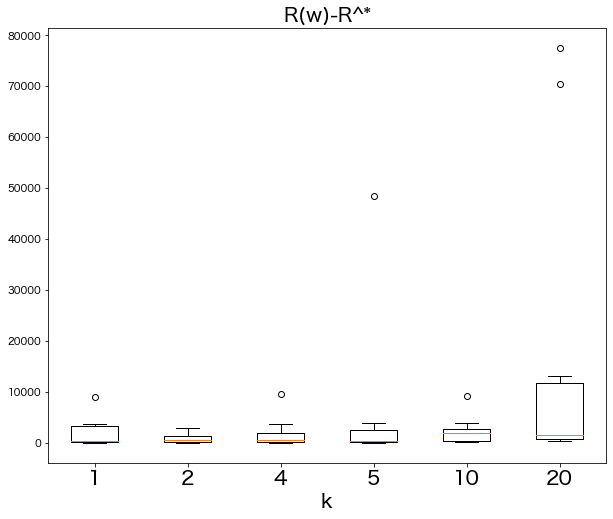

In [18]:
_, result_loss_lognormal = exp_lognormal.many_trails(trial_num=10,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_lognormal[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()


In [19]:
df = pd.DataFrame(result_loss_lognormal[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2068.226458,942.515803,1938.505988,5914.648712,2375.926951,17468.305219
std,2877.758205,971.813061,2915.141125,15024.620337,2772.384265,30110.013141
min,23.525748,37.262509,110.832033,74.937876,133.690451,378.389329
25%,168.589683,297.094214,306.452747,164.347622,372.725516,789.300075
50%,448.677263,554.345070,709.660429,491.648778,1980.398954,1594.788866
75%,3396.476219,1494.817737,2048.096998,2602.957446,2727.932717,11734.422664
max,9024.942968,3066.943629,9590.809180,48493.377509,9336.645513,77555.986403


In [20]:
df.quantile([0.75,0.8,0.9,0.95,0.99])

,1,2,4,5,10,20
0.75,3396.476219,1494.817737,2048.096998,2602.957446,2727.932717,11734.422664
0.80,3553.390350,1687.621347,2518.331932,2922.984092,2981.166137,24545.830665
0.90,4235.034586,1954.478086,4255.434048,8467.218086,4412.516228,71128.574462
0.95,6629.988777,2510.710857,6923.121614,28480.297797,6874.580871,74342.280433
0.99,8545.952130,2955.697074,9057.271666,44490.761567,8844.232585,76913.245209


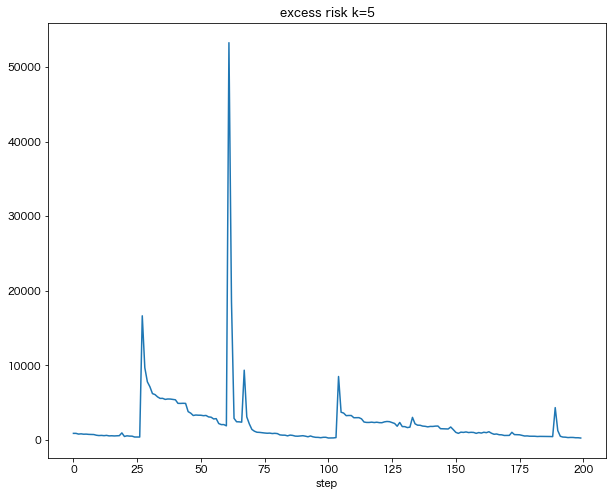

In [21]:
k = 5
_,loss_transition = exp_lognormal.transition(k=k,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(loss_transition)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()
